In [1]:
import lsst.pex.config as pexConfig
import lsst.pipe.base as pipeBase
import lsst.daf.base as dafBase
import lsst.afw.geom as afwGeom
import lsst.afw.math as afwMath
import lsst.afw.table as afwTable
import lsst.meas.astrom as measAstrom
import lsst.afw.image as afwImage

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import numpy as np
import diffimTests as dit
reload(dit);

In [2]:
sciImg = afwImage.ExposureF('calexpDir_b1631/0289820/calexp/calexp-0289820_11.fits')
preConvPsf = sciImg.getPsf()

1.0


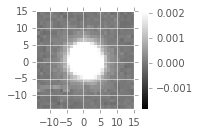

In [5]:
tmp = preConvPsf.computeKernelImage()
print tmp.getArray().sum()
dit.plotImageGrid((tmp,))

1.0
(25, 25)


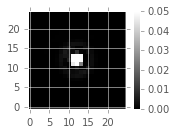

In [40]:
import cPickle
import gzip
psfMatchingKernel, preConvKernel = cPickle.load(gzip.GzipFile('spatialKernel_deCor.p.gz','rb'))

kimg = afwImage.ImageD(psfMatchingKernel.getDimensions())
bbox = sciImg.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
psfMatchingKernel.computeImage(kimg, True, xcen, ycen)

kappa = kimg.getArray()
print kappa.sum() #, preConvKernel.sum()
print kappa.shape #, preConvKernel.shape
dit.plotImageGrid((kappa,), clim=(0., 0.05)) # preConvKernel))

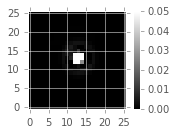

In [41]:
from lsst.ip.diffim import ImagePsfMatchTask, DipoleAnalysis, \
    SourceFlagChecker, KernelCandidateF, cast_KernelCandidateF, makeKernelBasisList, \
    KernelCandidateQa, DiaCatalogSourceSelectorTask, DiaCatalogSourceSelectorConfig, \
    GetCoaddAsTemplateTask, GetCalexpAsTemplateTask, DipoleFitTask, DecorrelateALKernelTask
dt = DecorrelateALKernelTask()
svar = 59.994526
tvar = 62.777829
kappa = DecorrelateALKernelTask._fixOddKernel(kappa)
#pcM = DecorrelateALKernelTask._fixOddKernel(preConvKernel)
dit.plotImageGrid((kappa,), clim=(0., 0.05)) # pcM))

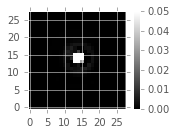

In [42]:
kappa = DecorrelateALKernelTask._matchKernelDims(kappa, pcM, keepMean=True)
dit.plotImageGrid((kappa,), clim=(0., 0.05)) # preConvKernel))

0.879282060972


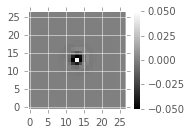

In [45]:
import scipy.fftpack

#pcMft = scipy.fftpack.fft2(pcM)
pcMft = 1.0
kft = scipy.fftpack.fft2(kappa)
kft = np.sqrt((svar + tvar) / (svar * pcMft**2. + tvar * kft**2.))
pck = scipy.fftpack.ifft2(kft)
pck = scipy.fftpack.ifftshift(pck.real)
fkernel = DecorrelateALKernelTask._fixEvenKernel(pck)
print fkernel.sum()
dit.plotImageGrid((fkernel,), clim=(-0.05, 0.05))

0.855406615355


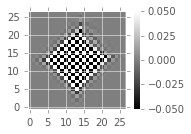

In [46]:
pcMft = scipy.fftpack.fft2(pcM)
kft = scipy.fftpack.fft2(kappa)
kft = np.sqrt((svar + tvar) / (svar * pcMft**2. + tvar * kft**2.))
pck = scipy.fftpack.ifft2(kft)
pck = scipy.fftpack.ifftshift(pck.real)
fkernel = DecorrelateALKernelTask._fixEvenKernel(pck)
print fkernel.sum()
dit.plotImageGrid((fkernel,), clim=(-0.05, 0.05))

In [26]:
print 4.69591491435*np.sqrt(2.)
print 3.94751740385*np.sqrt(2.)

6.64102655962
5.58263265023


In [30]:
(spatialKernel, preConvKernel) = cPickle.load(gzip.GzipFile('spatialKernel.p.gz', 'rb'))
preConvKernel

1.0 1.0
(25, 25) (27, 27)


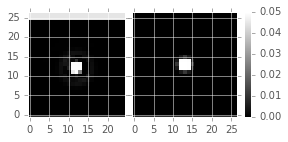

In [54]:
import cPickle
import gzip
psfMatchingKernel2, preConvKernel = cPickle.load(gzip.GzipFile('spatialKernel_preConvDeCor.p.gz','rb'))

kimg = afwImage.ImageD(psfMatchingKernel.getDimensions())
bbox = sciImg.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
psfMatchingKernel.computeImage(kimg, True, xcen, ycen)

kappa = kimg.getArray()
print kappa.sum(), preConvKernel.sum()
print kappa.shape, preConvKernel.shape
dit.plotImageGrid((kappa, preConvKernel), clim=(0., 0.05)) # preConvKernel))

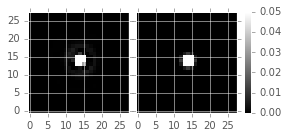

In [102]:
dt = DecorrelateALKernelTask()
svar = 59.994526
tvar = 62.777829
kappa = DecorrelateALKernelTask._fixOddKernel(kappa)
#pcM = DecorrelateALKernelTask._fixOddKernel(preConvKernel)

kappa = DecorrelateALKernelTask._matchKernelDims(kappa, pcM, keepMean=True)
dit.plotImageGrid((kappa, pcM), clim=(0., 0.05)) # preConvKernel))

(28, 28) (28, 28)


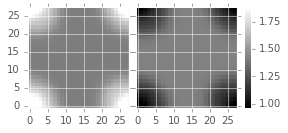

In [103]:
pcMft = scipy.fftpack.fft2(pcM)
pcMft = 1.0
kft = scipy.fftpack.fft2(kappa)
kft2 = np.sqrt((svar + tvar) / (svar * pcMft**2. + tvar * kft**2.))
print kft.shape, kft2.shape # , pcMft.shape
dit.plotImageGrid((kft.real**2., kft2.real))  # , pcMft.real

0.879282060972


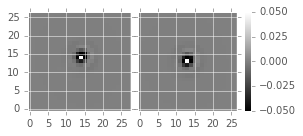

In [104]:
pck = scipy.fftpack.ifft2(kft2)
pck = scipy.fftpack.ifftshift(pck.real)
fkernel = DecorrelateALKernelTask._fixEvenKernel(pck)
print fkernel.sum()
dit.plotImageGrid((pck, fkernel), clim=(-0.05, 0.05))

(28, 28) (28, 28) (28, 28)


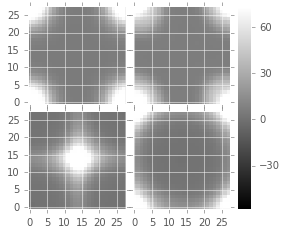

In [136]:
pcMft = scipy.fftpack.fft2(pcM)
#pcMft = scipy.fftpack.fftshift(pcMft)
kft = scipy.fftpack.fft2(kappa)
#kft = scipy.fftpack.fftshift(kft)
delta = 1e-2
kft2 = np.sqrt((svar + tvar + delta) / (svar * pcMft**2. + tvar * kft**2. + delta))
kft2a = scipy.fftpack.ifftshift(kft2)
print kft.shape, kft2.shape, pcMft.shape
dit.plotImageGrid((pcMft.real**2., kft.real**2., kft2.real, kft2a.real))

0.855254943544 -8.6729478388 15.9511521686


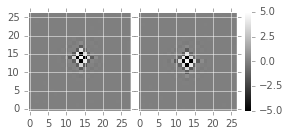

In [141]:
pck = scipy.fftpack.ifft2(kft2)
pck = scipy.fftpack.ifftshift(pck).real
fkernel = DecorrelateALKernelTask._fixEvenKernel(pck)
print fkernel.sum(), fkernel.min(), fkernel.max()
dit.plotImageGrid((pck, fkernel), clim=(-5, 5))